<a href="https://colab.research.google.com/github/Raashidh-Rizvi/Brain-Tumor-Detection/blob/main/Notebooks/IT24102772_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning into 'Brain-Tumor-Detection'...
remote: Enumerating objects: 6924, done.
remote: Counting objects: 100% (164/164), done.
remote: Compressing objects: 100% (156/156), done.
remote: Total 6924 (delta 56), reused 17 (delta 2), pack-reused 6760 (from 3)
Receiving objects: 100% (6924/6924), 150.93 MiB | 26.74 MiB/s, done.
Resolving deltas: 100% (59/59), done.
Updating files: 100% (7042/7042), done.
Training data shape: (5712, 224, 224, 3)
Testing data shape: (1311, 224, 224, 3)
Pixel value range: min = 0.0 , max = 1.0


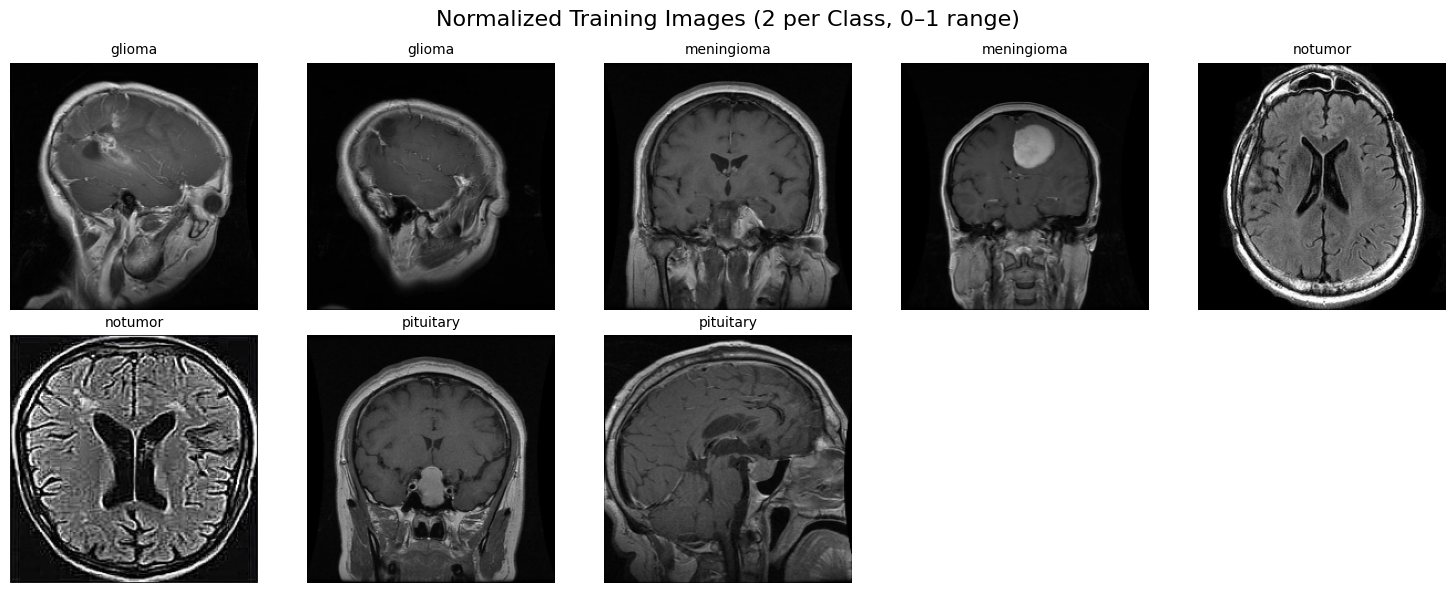

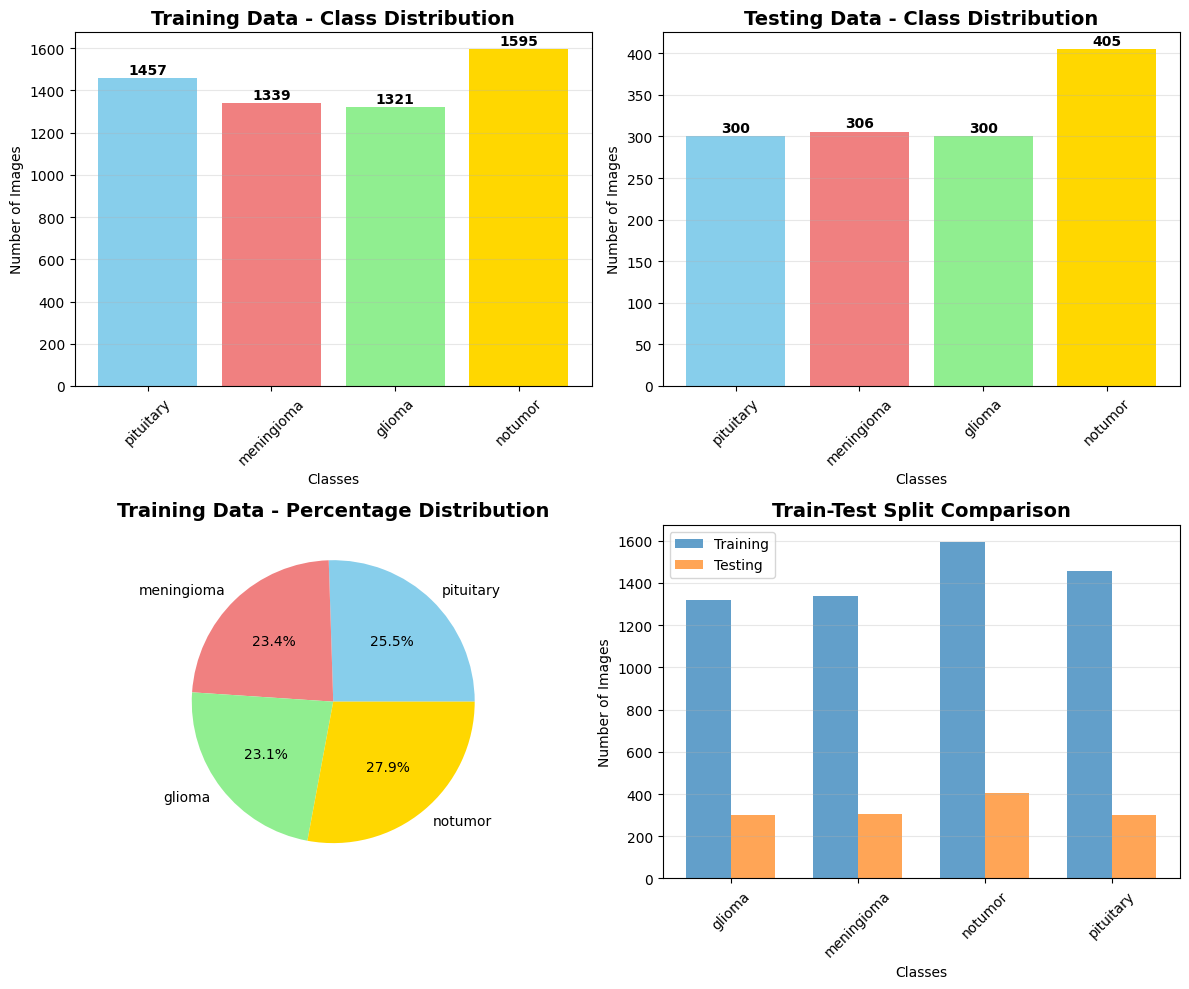


📊 DATASET STATISTICS:
Total Training Images: 5712
Total Testing Images: 1311
Total Dataset Size: 7023
Number of Classes: 4

Training Set Distribution:
  pituitary: 1457 images (25.5%)
  meningioma: 1339 images (23.4%)
  glioma: 1321 images (23.1%)
  notumor: 1595 images (27.9%)

Testing Set Distribution:
  pituitary: 300 images (22.9%)
  meningioma: 306 images (23.3%)
  glioma: 300 images (22.9%)
  notumor: 405 images (30.9%)


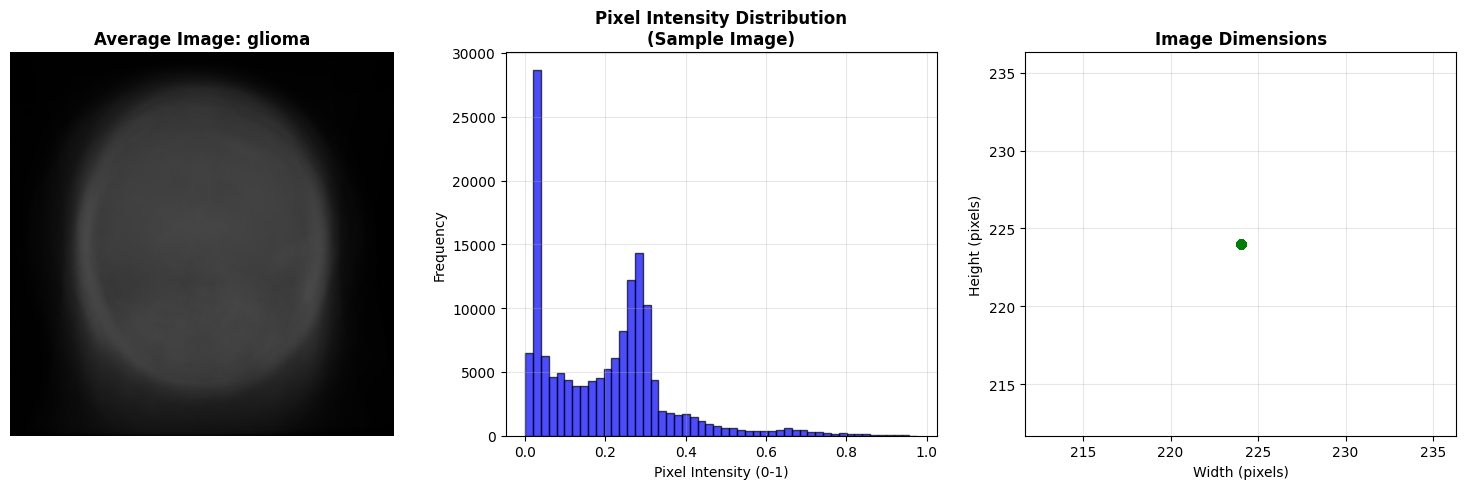

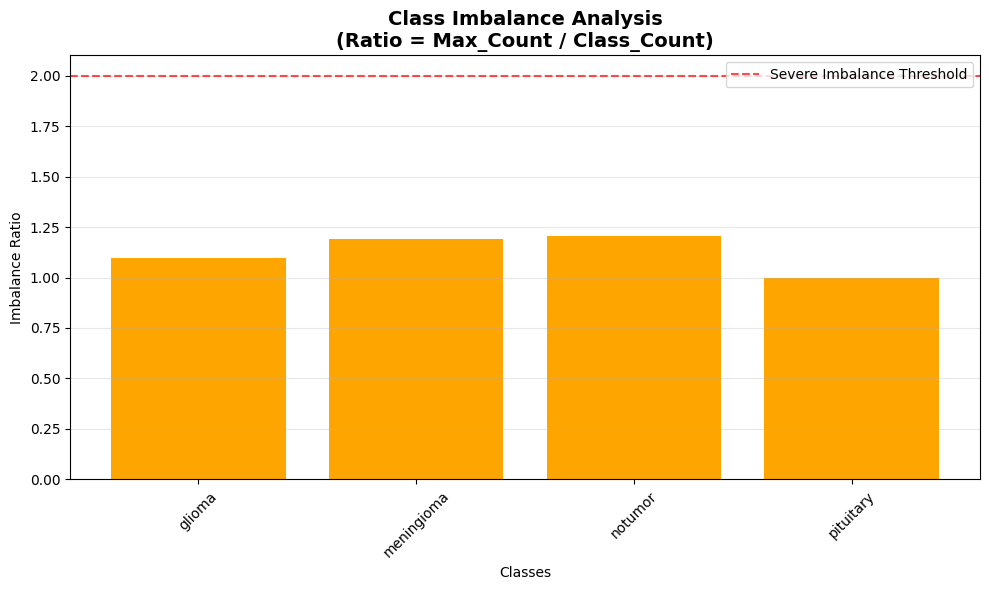


⚖ CLASS BALANCE ANALYSIS:
glioma: Ratio = 1.09 - ✅ Balanced
meningioma: Ratio = 1.19 - ✅ Balanced
notumor: Ratio = 1.21 - ✅ Balanced
pituitary: Ratio = 1.00 - ✅ Balanced

✅ Normalized dataset saved as .npy files


In [1]:
# Install required libraries
!pip install opencv-python scikit-image seaborn

# Clone the GitHub repository
!git clone https://github.com/Raashidh-Rizvi/Brain-Tumor-Detection.git

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from collections import Counter

# --------------------------
# Step 1: Dataset Path
# --------------------------
train_dir = "/content/Brain-Tumor-Detection/data/Training"
test_dir = "/content/Brain-Tumor-Detection/data/Testing"

IMG_SIZE = (224, 224)

# --------------------------
# Step 2: Function to Load & Normalize Images
# --------------------------
def load_and_normalize_images(directory):
    images = []
    labels = []

    for class_name in os.listdir(directory):
        class_folder = os.path.join(directory, class_name)
        if os.path.isdir(class_folder):
            for img_name in os.listdir(class_folder):
                img_path = os.path.join(class_folder, img_name)

                try:
                    # Load image
                    img = cv2.imread(img_path)
                    img = cv2.resize(img, IMG_SIZE)   # Resize to (224x224)

                    # Normalization: scale 0–255 → 0–1
                    img = img.astype("float32") / 255.0

                    images.append(img)
                    labels.append(class_name)
                except:
                    print("Corrupted image skipped:", img_path)

    return np.array(images), np.array(labels)

# --------------------------
# Step 3: Apply to Training & Test Data
# --------------------------
X_train, y_train = load_and_normalize_images(train_dir)
X_test, y_test = load_and_normalize_images(test_dir)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Pixel value range: min =", X_train.min(), ", max =", X_train.max())

# --------------------------
# Step 4: Enhanced Visualizations
# --------------------------

# Visualization 1: Sample Images from Each Class (your existing code)
class_names = np.unique(y_train)
images_per_class = 2
num_classes = len(class_names)

selected_images = []
selected_labels = []

for class_name in class_names:
    class_indices = np.where(y_train == class_name)[0]
    selected_indices = np.random.choice(class_indices, size=min(images_per_class, len(class_indices)), replace=False)
    selected_images.extend(X_train[selected_indices])
    selected_labels.extend(y_train[selected_indices])

selected_images = np.array(selected_images)
selected_labels = np.array(selected_labels)

plt.figure(figsize=(15, 6))
for i in range(len(selected_images)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(selected_images[i])
    plt.title(selected_labels[i], fontsize=10)
    plt.axis("off")

plt.suptitle("Normalized Training Images (2 per Class, 0–1 range)", fontsize=16)
plt.tight_layout()
plt.show()

# Visualization 2: Class Distribution Bar Chart
plt.figure(figsize=(12, 10))

# Subplot 1: Training Data Distribution
plt.subplot(2, 2, 1)
train_counts = Counter(y_train)
plt.bar(train_counts.keys(), train_counts.values(), color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'violet'])
plt.title('Training Data - Class Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (class_name, count) in enumerate(train_counts.items()):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontweight='bold')

# Subplot 2: Testing Data Distribution
plt.subplot(2, 2, 2)
test_counts = Counter(y_test)
plt.bar(test_counts.keys(), test_counts.values(), color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'violet'])
plt.title('Testing Data - Class Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

for i, (class_name, count) in enumerate(test_counts.items()):
    plt.text(i, count + 2, str(count), ha='center', va='bottom', fontweight='bold')

# Subplot 3: Pie Chart for Training Data
plt.subplot(2, 2, 3)
plt.pie(train_counts.values(), labels=train_counts.keys(), autopct='%1.1f%%',
        colors=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'violet'])
plt.title('Training Data - Percentage Distribution', fontsize=14, fontweight='bold')

# Subplot 4: Combined Train-Test Comparison
plt.subplot(2, 2, 4)
x = np.arange(len(class_names))
width = 0.35

plt.bar(x - width/2, [train_counts[cls] for cls in class_names], width, label='Training', alpha=0.7)
plt.bar(x + width/2, [test_counts[cls] for cls in class_names], width, label='Testing', alpha=0.7)

plt.title('Train-Test Split Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.xticks(x, class_names, rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n📊 DATASET STATISTICS:")
print("="*50)
print(f"Total Training Images: {len(X_train)}")
print(f"Total Testing Images: {len(X_test)}")
print(f"Total Dataset Size: {len(X_train) + len(X_test)}")
print(f"Number of Classes: {len(class_names)}")
print("\nTraining Set Distribution:")
for class_name, count in train_counts.items():
    percentage = (count / len(X_train)) * 100
    print(f"  {class_name}: {count} images ({percentage:.1f}%)")

print("\nTesting Set Distribution:")
for class_name, count in test_counts.items():
    percentage = (count / len(X_test)) * 100
    print(f"  {class_name}: {count} images ({percentage:.1f}%)")

# Visualization 3: Image Statistics
plt.figure(figsize=(15, 5))

# Subplot 1: Average image per class
plt.subplot(1, 3, 1)
average_images = []
for class_name in class_names:
    class_indices = np.where(y_train == class_name)[0]
    class_images = X_train[class_indices]
    avg_image = np.mean(class_images, axis=0)
    average_images.append(avg_image)

# Display first average image as example
plt.imshow(average_images[0])
plt.title(f'Average Image: {class_names[0]}', fontweight='bold')
plt.axis('off')

# Subplot 2: Pixel Intensity Distribution
plt.subplot(1, 3, 2)
sample_image = X_train[0].flatten()
plt.hist(sample_image, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Pixel Intensity Distribution\n(Sample Image)', fontweight='bold')
plt.xlabel('Pixel Intensity (0-1)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

# Subplot 3: Image Size Distribution
plt.subplot(1, 3, 3)
image_sizes = [img.shape for img in X_train]
heights = [size[0] for size in image_sizes]
widths = [size[1] for size in image_sizes]

plt.scatter(widths, heights, alpha=0.5, color='green')
plt.title('Image Dimensions', fontweight='bold')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Visualization 4: Class Balance Analysis
plt.figure(figsize=(10, 6))

# Calculate imbalance ratio
max_train_count = max(train_counts.values())
imbalance_ratios = [max_train_count / count for count in train_counts.values()]

plt.bar(class_names, imbalance_ratios, color=['red' if ratio > 2 else 'orange' for ratio in imbalance_ratios])
plt.axhline(y=2, color='r', linestyle='--', alpha=0.7, label='Severe Imbalance Threshold')
plt.title('Class Imbalance Analysis\n(Ratio = Max_Count / Class_Count)', fontsize=14, fontweight='bold')
plt.xlabel('Classes')
plt.ylabel('Imbalance Ratio')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n⚖ CLASS BALANCE ANALYSIS:")
print("="*40)
for class_name, ratio in zip(class_names, imbalance_ratios):
    status = "⚠ Severe Imbalance" if ratio > 2 else "✅ Balanced"
    print(f"{class_name}: Ratio = {ratio:.2f} - {status}")

# --------------------------
# Step 5: Save Normalized Data (optional)
# --------------------------
np.save("X_train_normalized.npy", X_train)
np.save("y_train_labels.npy", y_train)
np.save("X_test_normalized.npy", X_test)
np.save("y_test_labels.npy", y_test)

print("\n✅ Normalized dataset saved as .npy files")